# Kuzminov Artem

Task 4 - run a k-means Cluster Analysis.

Your assignment is to run a k-means cluster analysis to identify subgroups of observations in your data set that have similar patterns of response on a set of clustering variables.

In [248]:
# import libraries
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 
import numpy as np
import pandas as pnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.datasets import load_boston

**Data set description**

Predictors:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

Response variable:

MEDV - Median value of owner-occupied homes in $1000's


In [225]:
data = load_boston()
data = load_boston()
X_df = pnd.DataFrame(data["data"],columns=data.feature_names)
y_df = pnd.DataFrame(data["target"],columns=["MEDV"])
for clmn in X_df.columns:
    X_df[clmn]=preprocessing.scale(X_df[clmn].astype('float64'))
X_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [236]:
y_df.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [226]:
#Perfrom train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(379, 13) (127, 13) (379, 1) (127, 1)


In [227]:
cluster_numbers = range(1,10)
meandist=[]

for k in cluster_numbers:
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    clus_pred = model.predict(X_train)
    meandist.append(sum(np.min(cdist(X_train, model.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

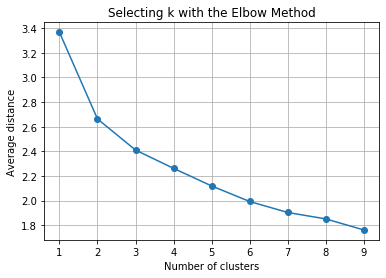

In [228]:
plt.plot(cluster_numbers, meandist,"-o")
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.grid(True)
plt.title('Selecting k with the Elbow Method')
plt.show()

Elbow method shows that average distance starts minimizing slower with 2, 3 and 5 number of clusters. I'll take 3.

In [229]:
# Interpret 3 cluster solution
model3 = KMeans(n_clusters = 3)
model3.fit(X_train)
clusassign=model3.predict(X_train)

Principal component analysis is used to reduce number of dimentions: instead of dealing with 13 predictors, we will use 2 new computed variables

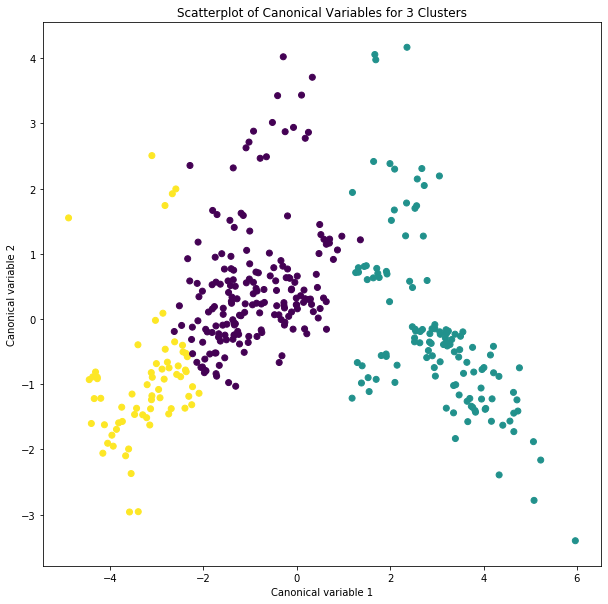

In [230]:
plt.figure(figsize=[10,10])

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(X_train)

plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_, cmap='viridis')
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

The clusters could be seen clearly. Only few of yellow cluster are spread too far from the center of the big 

In [231]:
X_train.reset_index(level=0, inplace=True)
cluslist=list(X_train['index'])
labels=list(model3.labels_)
newlist=dict(zip(cluslist, labels))
newclus=pnd.DataFrame.from_dict(newlist, orient='index')
newclus.columns = ['cluster']

In [232]:
newclus.reset_index(level=0, inplace=True)
merged_train=pnd.merge(X_train, newclus, on='index')
merged_train.head(n=100)
merged_train.cluster.value_counts()

0    185
1    127
2     67
Name: cluster, dtype: int64

The number of observations belonging to the third cluster is smaller than numbers for the first and the second clusters.

In [235]:
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
clustergrp.head()

Clustering variable means by cluster


,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
cluster,,,,,,,,,,,,,,
0,181.594595,-0.376542,-0.336228,-0.361937,0.068244,-0.342666,0.032764,-0.043260,0.033278,-0.582035,-0.63871,-0.175882,0.307560,-0.237444
1,366.937008,0.748522,-0.487722,1.117814,0.037716,1.130991,-0.388815,0.800781,-0.848570,1.182395,1.24991,0.636558,-0.610950,0.857357
2,228.417910,-0.412117,1.768117,-1.053954,0.021506,-1.116623,0.632623,-1.381724,1.408392,-0.586487,-0.63700,-0.704038,0.365126,-0.924426


Lasso regression that was applied to this data set have shown, that LSTAT, DIS and RM explain MEDV better than others. It could be figured here as well: median values differ a lot among the clusters.

In [238]:
y_train.reset_index(level=0, inplace=True)
merged_train_all=pnd.merge(y_train, merged_train, on='index')
sub1 = merged_train_all[['MEDV', 'cluster']].dropna()

In [262]:
gpamod = smf.ols(formula='MEDV ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     69.07
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           2.83e-26
Time:                        18:38:14   Log-Likelihood:                -1320.0
No. Observations:                 379   AIC:                             2646.
Df Residuals:                     376   BIC:                             2658.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          24.1805      0.581     

Means for MEDV by cluster
              MEDV
cluster           
0        24.180541
1        16.342520
2        29.519403


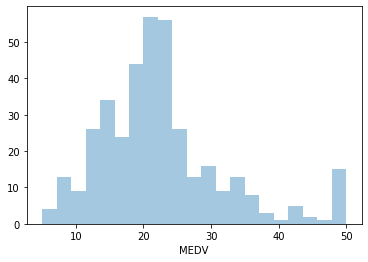

In [256]:
print ('Means for MEDV by cluster')
m1= sub1.groupby('cluster').mean()
print(m1)
sns.distplot(sub1['MEDV'], kde=False)

In [255]:
print ('Standard deviations for MEDV by cluster')
m2= sub1.groupby('cluster').std()
print(m2)

Standard deviations for MEDV by cluster
             MEDV
cluster          
0        7.754904
1        7.938199
2        8.265192


Standard deviation looks similar among the clusters.

In [247]:
mc1 = multi.MultiComparison(sub1['MEDV'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -7.838 0.001 -9.9824 -5.6936   True
     0      2   5.3389 0.001  2.6855  7.9922   True
     1      2  13.1769 0.001 10.3671 15.9867   True
---------------------------------------------------


**Output**

Due to the results of mean values of MEDV inside the clusters, they could be interpreted as middle-priced houses in the 1st cluster, cheap houses in the 2nd cluster and expensive houses in the 3rd cluster.

ANOVA was used to describe the difference between clusters for MEDV variable. A tukey test was used for post hoc comparisons between the clusters.
The tukey test shows that the clusters differed significantly in MEDV.